In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split


In [3]:
PATH = "training_data"
train_dir = os.path.join(PATH, 'train')

train_men_dir_list = []

for i in range(8):
    train_men_dir_list.append(os.path.join(train_dir,"m" + str(i+1) ) )

# print(train_men_dir_list[0])

In [4]:
total_train = 0
total_val =0

for i in train_men_dir_list:
    # print(i)
    if os.path.isdir(i):
        total_train += len(os.listdir(i))

print(total_train)

20560


In [5]:
batch_size = 128
IMG_HEIGHT = 180
IMG_WIDTH = 150

# IMG_HEIGHT = 360
# IMG_WIDTH = 300

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255,validation_split=0.3) # Generator for 
train_data_gen = train_image_generator.flow_from_directory(
 batch_size=batch_size,
 directory=train_dir,
 shuffle=True,
 subset = "training",
 target_size=(IMG_HEIGHT, IMG_WIDTH),
 class_mode='categorical')

#  directory=validation_dir,
val_data_gen = train_image_generator.flow_from_directory(
 batch_size=batch_size,
 directory=train_dir,
 subset = "validation",
 target_size=(IMG_HEIGHT, IMG_WIDTH),
 class_mode='categorical')

path = os.getcwd()  
files = os.listdir(train_dir)  
num_classes = len(files)
print(num_classes)

Found 24784 images belonging to 4 classes.
Found 10618 images belonging to 4 classes.
4


In [8]:
# print(train_data_gen[0])

(array([[[[0.70980394, 0.7568628 , 0.80392164],
         [0.6901961 , 0.7372549 , 0.7843138 ],
         [0.7372549 , 0.7843138 , 0.8313726 ],
         ...,
         [0.69411767, 0.654902  , 0.6156863 ],
         [0.69411767, 0.654902  , 0.6156863 ],
         [0.69411767, 0.654902  , 0.6156863 ]],

        [[0.7058824 , 0.75294125, 0.8000001 ],
         [0.65882355, 0.7058824 , 0.75294125],
         [0.8431373 , 0.89019614, 0.93725497],
         ...,
         [0.69411767, 0.654902  , 0.6156863 ],
         [0.69411767, 0.654902  , 0.6156863 ],
         [0.69411767, 0.654902  , 0.6156863 ]],

        [[0.72156864, 0.7725491 , 0.8078432 ],
         [0.7411765 , 0.78823537, 0.8352942 ],
         [0.8352942 , 0.882353  , 0.9294118 ],
         ...,
         [0.69411767, 0.654902  , 0.6156863 ],
         [0.69411767, 0.654902  , 0.6156863 ],
         [0.69411767, 0.654902  , 0.6156863 ]],

        ...,

        [[0.28235295, 0.19607845, 0.1137255 ],
         [0.6313726 , 0.54901963, 0.4666667 

In [7]:
label_dict = train_data_gen.class_indices
print(label_dict)

{'w7': 3, 'm7': 1, 'm1': 0, 'w1': 2}


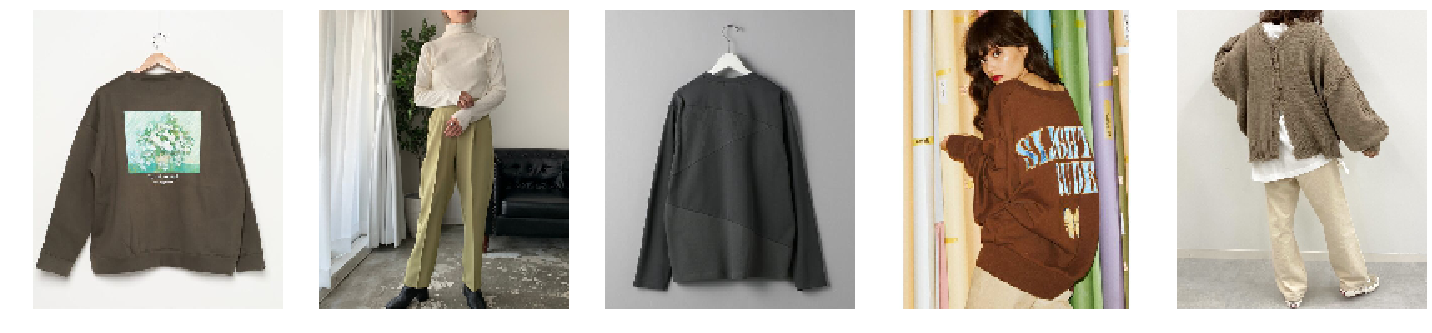

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


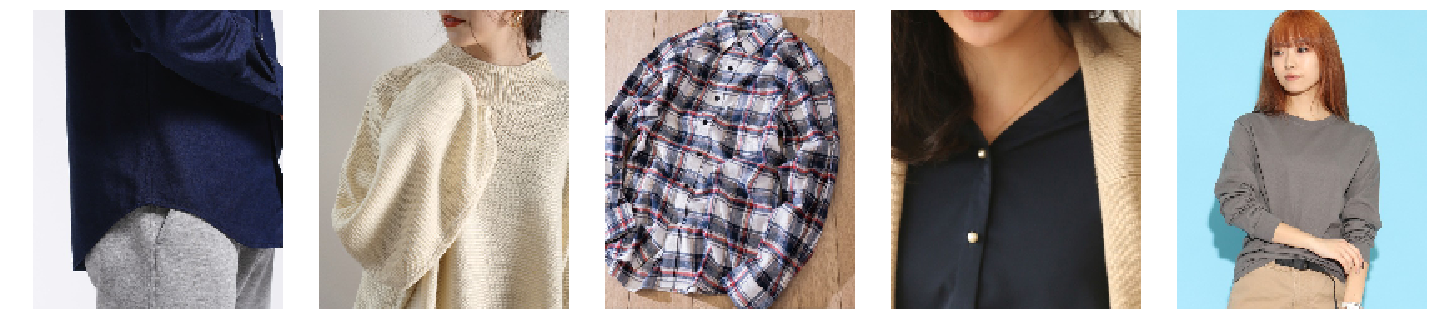

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# next関数とは、イテレータ内から要素を取り出すための関数です。
sample_training_images, label_train  = next(train_data_gen) 
plotImages(sample_training_images[:5])
print(label_train[:5])

sample_validation_images, label_val  = next(val_data_gen) 
plotImages(sample_validation_images[:5])
# print(sample_training_images[0])
# print(type(label_train[:5]))
print(label_val[:5])


In [12]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    # Dense(1, activation='sigmoid')
    Dense(num_classes, activation='softmax')    
])
model.compile(optimizer='adam',
              # loss='binary_crossentropy',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 180, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25344)            

In [13]:
train_num = 5
epochs = 7

history = model.fit_generator(
    generator = train_data_gen,
    # steps_per_epoch=total_train * 0.7 // batch_size ,
    steps_per_epoch=train_num,    
    epochs=epochs,
    validation_data=val_data_gen,
    # validation_steps=total_train * 0.3 // batch_size 
    validation_steps=train_num
)

Epoch 1/7
5/5 [==============================] - 12s 2s/step - accuracy: 0.2797 - loss: 3.2406 - val_loss: 1.5775 - val_accuracy: 0.3016
Epoch 2/7
5/5 [==============================] - 11s 2s/step - accuracy: 0.2984 - loss: 1.4197 - val_loss: 1.3821 - val_accuracy: 0.2547
Epoch 3/7
5/5 [==============================] - 11s 2s/step - accuracy: 0.3109 - loss: 1.3794 - val_loss: 1.3638 - val_accuracy: 0.3266
Epoch 4/7
5/5 [==============================] - 11s 2s/step - accuracy: 0.3047 - loss: 1.3756 - val_loss: 1.3672 - val_accuracy: 0.3063
Epoch 5/7
5/5 [==============================] - 11s 2s/step - accuracy: 0.3219 - loss: 1.3592 - val_loss: 1.3686 - val_accuracy: 0.3281
Epoch 6/7
5/5 [==============================] - 11s 2s/step - accuracy: 0.2797 - loss: 1.3613 - val_loss: 1.3638 - val_accuracy: 0.3047
Epoch 7/7
5/5 [==============================] - 11s 2s/step - accuracy: 0.2969 - loss: 1.3611 - val_loss: 1.3500 - val_accuracy: 0.3109


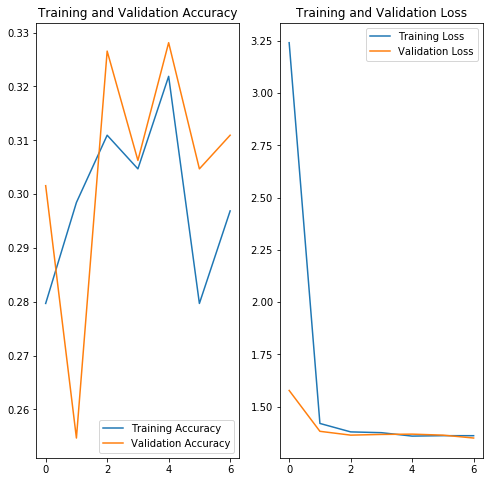

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
import json

model.save_weights('param.hdf5')
json_string = model.to_json()

open('model.json', 'w').write(json_string)


3586